In [1]:
import sys
sys.path.append("../util/")

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sequential_minimal_optimization1(dataset, C, epochs=40):
    bias = 0.0
    alphas = np.zeros(dataset.shape[0])
    iter_ = 0
    while (iter_<epochs):
        isChanged = False
        for i in range(dataset.shape[0]):
            Ei = np.dot(np.multiply(alphas, dataset[:, 2]), np.matmul(dataset[:, :2], dataset[i, :2]))+bias-dataset[i, 2]
            if ((dataset[i, 2]*Ei < -0.001) and (alphas[i] < C)) or \
               ((dataset[i, 2]*Ei > 0.001) and (alphas[i] > 0)):
                j = i
                while (j==i):
                    j = np.random.randint(0, dataset.shape[0])
                Ej = np.dot(np.multiply(alphas, dataset[:, 2]), np.matmul(dataset[:, :2], dataset[j, :2]))+bias-dataset[j, 2]
                alphaI = alphas[i].copy()
                alphaJ = alphas[j].copy()
                if (dataset[i, 2] != dataset[j, 2]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if (L==H):
                    #print("L==H")
                    continue
                eta = 2.0*np.dot(dataset[i, :2], dataset[j, :2]) \
                      -np.dot(dataset[i, :2], dataset[i, :2]) \
                      -np.dot(dataset[j, :2], dataset[j, :2])
                if (eta>=0):
                    #print("eta>=0")
                    continue
                alphas[j] -= dataset[j, 2]*(Ei - Ej)/eta
                if (alphas[j]>H):
                    alphas[j] = H
                elif (alphas[j]<L):
                    alphas[j] = L
                if (abs(alphas[j] - alphaJ) < 0.00001):
                    #print("j not moving enough")
                    continue
                alphas[i] += dataset[j, 2]*dataset[i, 2]*(alphaJ - alphas[j])
                bias1 = bias - Ei \
                     -dataset[i, 2]*(alphas[i]-alphaI)*np.dot(dataset[i, :2], dataset[i, :2]) \
                     -dataset[j, 2]*(alphas[j]-alphaJ)*np.dot(dataset[i, :2], dataset[j, :2])
                bias2 = bias - Ej \
                     -dataset[i, 2]*(alphas[i]-alphaI)*np.dot(dataset[i, :2], dataset[j, :2]) \
                     -dataset[j, 2]*(alphas[j]-alphaJ)*np.dot(dataset[j, :2], dataset[j, :2])
                if (0 < alphas[i]) and (C > alphas[i]): bias = bias1
                elif (0 < alphas[j]) and (C > alphas[j]): bias = bias2
                else: bias = (bias1 + bias2)/2.0
                isChanged = True
        if isChanged:
            iter_ = 0
        else:
            iter_ += 1
    return bias, alphas

0.1753642890866954 [ 0.30566249 -0.61852797]


d:\python37\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.


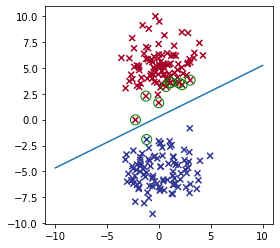

In [3]:
if __name__ == "__main__":
    from ipynb.fs.full.data_generator_2d import gaussian_2d, double_moon, visualize_data
    dataset = gaussian_2d(100, [0,5], [0,-5], ((4, 0), (4, 3)), ((4, 0), (0, 4)))
    b, alphas = sequential_minimal_optimization(dataset, 0.6)
    w = np.matmul(np.multiply(alphas, dataset[:, 2]), dataset[:, :2])
    print(b, w)
    fig = plt.figure()
    ax = fig.subplots(1, 1)
    visualize_data(dataset, ax)
    ax.scatter(dataset[np.nonzero(alphas>0), 0], dataset[np.nonzero(alphas>0), 1], marker="o", color="", edgecolors="g", s=100)
    t = np.linspace(-10, 10, num=2)
    if not (w[1] == 0):
        ax.plot(t, -(w[0]*t+b)/w[1])
    ax.set_aspect('equal')
    plt.show()